In [313]:
# -*- coding: utf-8 -*-

import os
import sys
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import ccxt
import time
import calendar
from datetime import datetime, date, timedelta

# root = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
# sys.path.append(root + '/python')



In [4]:
#Exchanges

print('CCXT Version:', ccxt.__version__)

for exchange_id in ccxt.exchanges:
    try:
        exchange = getattr(ccxt, exchange_id)()
        print(exchange_id)
        # do what you want with this exchange
        # pprint(dir(exchange))
    except Exception as e:
        print(e)

CCXT Version: 4.0.90
ace
alpaca
ascendex
bequant
bigone
binance
binancecoinm
binanceus
binanceusdm
bingx
bit2c
bitbank
bitbay
bitbns
bitcoincom
bitfinex
bitfinex2
bitflyer
bitforex
bitget
bithumb
bitmart
bitmex
bitopro
bitpanda
bitrue
bitso
bitstamp
bitstamp1
bittrex
bitvavo
bkex
bl3p
blockchaincom
btcalpha
btcbox
btcmarkets
btctradeua
btcturk
bybit
cex
coinbase
coinbaseprime
coinbasepro
coincheck
coinex
coinfalcon
coinmate
coinone
coinsph
coinspot
cryptocom
currencycom
delta
deribit
digifinex
exmo
fmfwio
gate
gateio
gemini
hitbtc
hitbtc3
hollaex
huobi
huobijp
huobipro
idex
independentreserve
indodax
kraken
krakenfutures
kucoin
kucoinfutures
kuna
latoken
lbank
lbank2
luno
lykke
mercado
mexc
mexc3
ndax
novadax
oceanex
okcoin
okex
okex5
okx
paymium
phemex
poloniex
poloniexfutures
probit
tidex
timex
tokocrypto
upbit
wavesexchange
wazirx
whitebit
woo
yobit
zaif
zonda


In [371]:
#Get the last 200 days of data for BTC/USDT and then get the first date and then redo the process for the previous 200 days and so on
#until you reach the first date of the exchange
def get_ohlcv_200_days(exchange):
    #exchange = ccxt.binance()
    since = None
    df_ohlcv = pd.DataFrame()
    while True:
        ohlcv = exchange.fetch_ohlcv('BTC/USD', '1d', limit=200, since=since)
        #print(ohlcv)
        df = pd.DataFrame(ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
        df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
        df['Open'] = df['Open'].astype(np.float64)
        df['High'] = df['High'].astype(np.float64)
        df['Low'] = df['Low'].astype(np.float64)
        df['Close'] = df['Close'].astype(np.float64)
        df['Volume'] = df['Volume'].astype(np.float64)
        df.set_index('Time', inplace=True)
        df_ohlcv = df_ohlcv.append(df)
        #return df_ohlcv
        #check if df and df_ohlcv have at least one common date
        
        if len(df_ohlcv[df_ohlcv.index.duplicated()]) < 100:
            #convert the first date of the dataframe to timestamp and subtract 200 days
            try:
                since = int(df.index[0].timestamp()*1000 - 200*24*60*60*1000)
                #print(since)
            except Exception as e:
                print(e)
                break
        else:
            break
    df_ohlcv.sort_index(inplace=True)
    #delete the duplicated dates
    df_ohlcv = df_ohlcv[~df_ohlcv.index.duplicated(keep='first')]
    return df_ohlcv


In [372]:
exchange = ccxt.bitstamp()
df_ex = get_ohlcv_200_days(exchange)
df_ex

index 0 is out of bounds for axis 0 with size 0


,Open,High,Low,Close,Volume
Time,,,,,
2011-08-17 21:00:00,10.90,10.90,10.90,10.90,0.489908
2011-08-18 21:00:00,11.85,11.85,11.15,11.69,1.926578
2011-08-19 21:00:00,11.70,11.70,11.70,11.70,0.085470
2011-08-20 21:00:00,11.70,11.70,11.70,11.70,0.085470
2011-08-21 21:00:00,11.70,11.70,11.70,11.70,0.028632
...,...,...,...,...,...
2023-09-13 21:00:00,26229.00,26849.00,26143.00,26529.00,2087.026026
2023-09-14 21:00:00,26529.00,26878.00,26228.00,26607.00,1388.809004
2023-09-15 21:00:00,26609.00,26767.00,26459.00,26571.00,609.713803


In [353]:
since = int(df_ex.index[0].timestamp()*1000 - 200*24*60*60*1000)
since

1660510800000

In [348]:
since = int(df.index[0].timestamp()*1000 - 200*24*60*60*1000)
print(since)

1473022800000


ace ['ADA/TWD', 'APE/TWD', 'ARB/TWD', 'BAAS/TWD', 'BNB/TWD', 'BTC/TWD', 'DEC/TWD', 'DET/TWD', 'DOGE/TWD', 'DOT/TWD', 'DS/TWD', 'ETH/TWD', 'FTM/TWD', 'GALA/TWD', 'HT/TWD', 'LTC/TWD', 'MATIC/TWD', 'MOCT/TWD', 'QQQ/TWD', 'SAND/TWD', 'SHIB/TWD', 'SOL/TWD', 'SSV/TWD', 'TRX/TWD', 'UNIC/TWD', 'USDC/TWD', 'USDT/TWD', 'WOO/TWD', 'XRP/TWD', 'ACEX/USDT', 'ADA/USDT', 'ANKR/USDT', 'APE/USDT', 'AVAX/USDT', 'AXS/USDT', 'BNB/USDT', 'BTC/USDT', 'CHZ/USDT', 'DOGE/USDT', 'DOT/USDT', 'DYDX/USDT', 'ETH/USDT', 'FTM/USDT', 'GALA/USDT', 'LINK/USDT', 'LTC/USDT', 'MATIC/USDT', 'SAND/USDT', 'SHIB/USDT', 'SOL/USDT', 'TRX/USDT', 'WOO/USDT', 'XRP/USDT', 'YFI/USDT', 'ETH/BTC']
alpaca ['XTZ/USDC', 'MKR/USDC', 'DOT/USDC', 'ETH/USDC', 'LINK/USDC', 'UNI/USD', 'UNI/USDC', 'UNI/USDT', 'GRT/USDC', 'BTC/USD', 'LTC/BTC', 'LTC/USD', 'LTC/USDT', 'BCH/USDC', 'XTZ/USD', 'AAVE/USDT', 'BAT/USDC', 'YFI/USD', 'DOT/USD', 'DOGE/USDT', 'BAT/USD', 'AVAX/USDT', 'MKR/USD', 'BTC/USDC', 'BTC/USDT', 'CRV/USDC', 'BCH/BTC', 'BCH/USD', 'BCH/USD
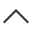

In [155]:
#pairs of each exchange
ex_pairs = {}
for ex in ccxt.exchanges:
    try:
        exchange = getattr(ccxt, ex)()
        markets = exchange.load_markets()
        pairs = list(markets.keys())
        ex_pairs[ex] = pairs
        print(ex, pairs)
    except Exception as e:
        print(e)


In [340]:
ex = "mercado"
start_dt = datetime.strptime('20100101', "%Y%m%d")
since = calendar.timegm(start_dt.utctimetuple())*1000

exchange = getattr(ccxt, ex)()
lista_ohlcv = exchange.fetch_ohlcv(symbol="BTC/BRL", timeframe="1d", since=since, limit=6_000)
#lista_ohlcv =exchange.fetchOHLCV(symbol="BTC/USD")
df = pd.DataFrame(lista_ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
df['Open'] = df['Open'].astype(np.float64)
df['High'] = df['High'].astype(np.float64)
df['Low'] = df['Low'].astype(np.float64)
df['Close'] = df['Close'].astype(np.float64)
df['Volume'] = df['Volume'].astype(np.float64)
df.set_index('Time', inplace=True)
print(f"{ex} : {len(df)}, {df.index[0]}, {df.index[-1]}")

mercado : 3751, 2013-06-11 21:00:00, 2023-09-17 21:00:00


<AxesSubplot:title={'center':'mercado BTC/BRL'}, xlabel='Time'>

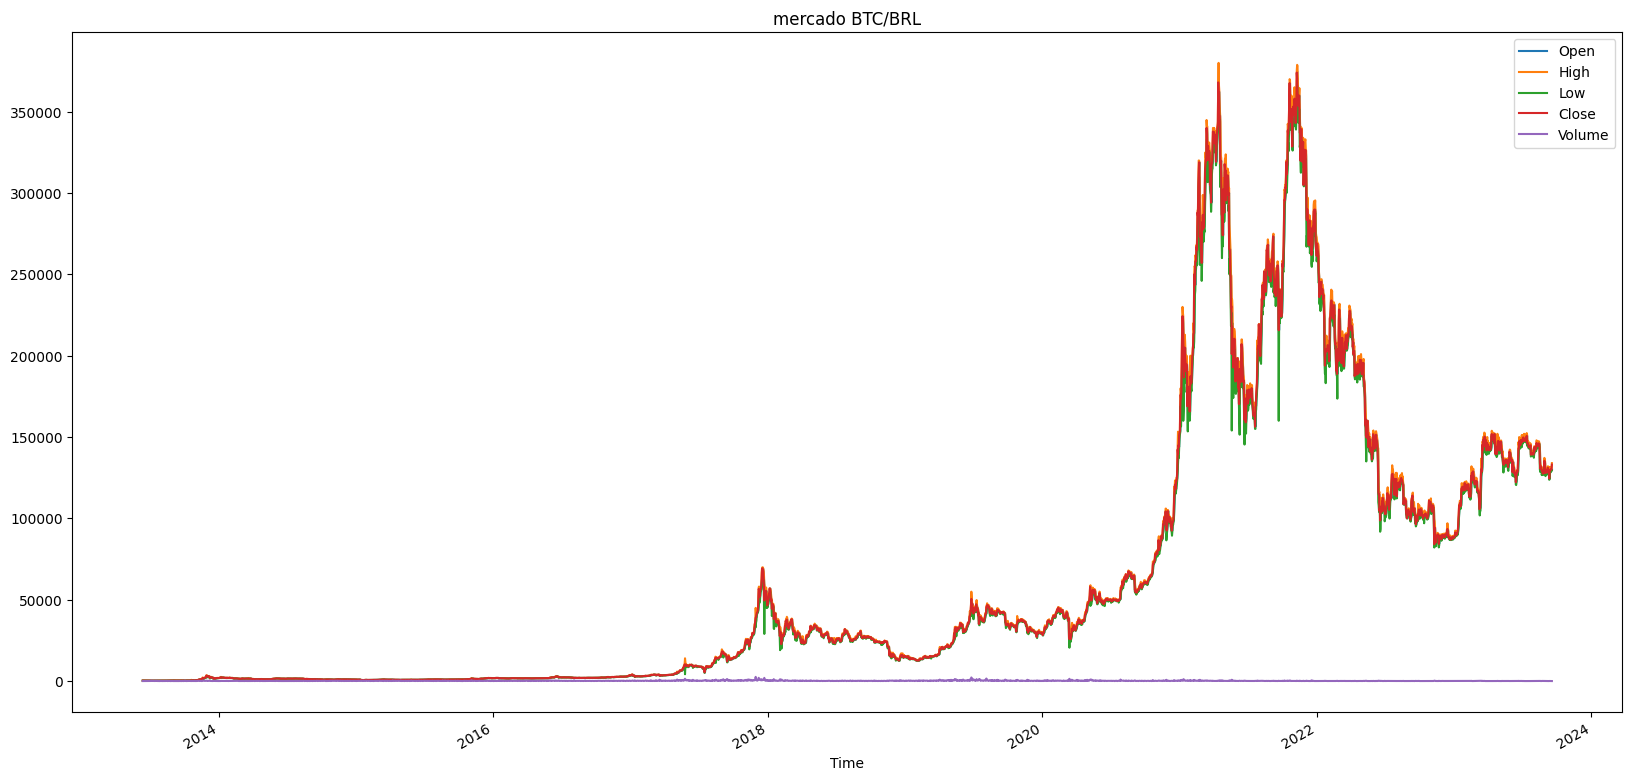

In [342]:
df.plot(figsize=(20,10), title=f"{ex} BTC/BRL")

In [ ]:
ex= "binance"
exchange = getattr(ccxt, ex)()
lista_ohlcv = exchange.fetch_ohlcv(symbol="BTC/USD", timeframe="1d", since=since, limit=6000)
# do what you want with this exchange
# pprint(dir(exchange))

df = pd.DataFrame(lista_ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
df['Open'] = df['Open'].astype(np.float64)
df['High'] = df['High'].astype(np.float64)
df['Low'] = df['Low'].astype(np.float64)
df['Close'] = df['Close'].astype(np.float64)
df['Volume'] = df['Volume'].astype(np.float64)
df.set_index('Time', inplace=True)
print(f"{ex} : {len(df)}, {df.index[0]}, {df.index[-1]}")

ace does not have market symbol BTC/USD
ace does not have market symbol BTC/USD
alpaca : 1162, 2020-04-08 02:00:00, 2023-07-13 02:00:00
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
ascendex : 480, 2022-05-26 21:00:00, 2023-09-17 21:00:00
type(df_200):  <class 'pandas.core.frame.DataFrame'>
bequant {"timestamp":"2023-09-18T17:24:02.350Z","error":{"description":"Validation error. Please, check request parameters and try again.","code":10001,"message":"Bad request parameter [limit]. Parameter must be in [1, 1000]"},"path":"/api/3/public/candles?symbols=BTCUSD&period=D1&from=2009-01-01T00%3A00%3A00.000Z&limit=6000","requestId":"8379649c-3321710"}
bequant : 200, 2023-01-19 21:00:00, 2023-09-17 21:00:00
type(df_200):  <class 'pandas.core.frame.DataFrame'>
bigone does not have market symbol BTC/USD
bigone does not have market symbol BTC/USD
binance
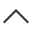
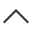

In [381]:
#função certa, ótima
start_dt = datetime.strptime('20090101', "%Y%m%d")
since = calendar.timegm(start_dt.utctimetuple())*1000

dict_exchanges = {}

for ex in ccxt.exchanges:
    df_direct = pd.DataFrame()
    df_200 = pd.DataFrame()
    try:
        exchange = getattr(ccxt, ex)()
        lista_ohlcv = exchange.fetch_ohlcv(symbol="BTC/USD", timeframe="1d", since=since, limit=6000)
        # do what you want with this exchange
        # pprint(dir(exchange))

        df = pd.DataFrame(lista_ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
        df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
        df['Open'] = df['Open'].astype(np.float64)
        df['High'] = df['High'].astype(np.float64)
        df['Low'] = df['Low'].astype(np.float64)
        df['Close'] = df['Close'].astype(np.float64)
        df['Volume'] = df['Volume'].astype(np.float64)
        df.set_index('Time', inplace=True)
        print(f"{ex} : {len(df)}, {df.index[0]}, {df.index[-1]}")
        df_direct = df
        dict_exchanges[ex] = df_direct
        
    except Exception as e:
        print(e)
    
    # try the 200 day function
    try:
        df = get_ohlcv_200_days(exchange)
        print(f"{ex} : {len(df)}, {df.index[0]}, {df.index[-1]}")
        df_200 = df

        # stay with the greater dataframe
        print("type(df_200): ", type(df_200))
        if (len(df_200) > len(df_direct)) & (type(df_200) == pd.core.frame.DataFrame):
            dict_exchanges[ex] = df_200
    except Exception as e:
        print(e)
    

In [382]:
#dict_exchanges_copy = dict_exchanges.copy()
dict_exchanges = dict_exchanges_copy.copy()

In [388]:

#delete the bittrex and ndax exchanges (error in data)
del dict_exchanges['bittrex']
del dict_exchanges['binancecoinm']
del dict_exchanges['ndax']
del dict_exchanges['currencycom']
del dict_exchanges['bitfinex2'] #repeted data from bitfinex
del dict_exchanges["coinbasepro"] #repeted data from coinbaseprime
dict_exchanges

{'alpaca':                          Open      High       Low     Close     Volume
 Time                                                                  
 2020-04-08 02:00:00   7314.00   7314.00   7314.00   7314.00    0.00010
 2020-04-14 02:00:00   7101.50   7101.50   7100.00   7100.00    0.00020
 2020-04-22 02:00:00   7118.50   7118.50   7118.50   7118.50    0.00010
 2020-04-28 02:00:00   7748.50   7836.00   7748.50   7836.00    0.08400
 2020-04-30 02:00:00   8829.00   8829.00   8653.00   8653.00    0.01340
 ...                       ...       ...       ...       ...        ...
 2023-07-09 02:00:00  27062.82  28040.26  27062.82  27543.55   70.34345
 2023-07-10 02:00:00  27543.55  28100.00  27031.27  27123.35  101.95629
 2023-07-11 02:00:00  27184.97  27469.53  26900.00  26945.00   64.85446
 2023-07-12 02:00:00  26945.00  27500.01  26600.00  26960.18   85.21626
 2023-07-13 02:00:00  26960.19  27400.00  24900.00  25073.21  158.39798
 
 [1162 rows x 5 columns],
 'ascendex':              

In [389]:
#delete the exchanges that have less than 365 days of data (one year)
for ex in list(dict_exchanges.keys()):
    if len(dict_exchanges[ex]) < 365:
        del dict_exchanges[ex]
len(dict_exchanges.keys())

14

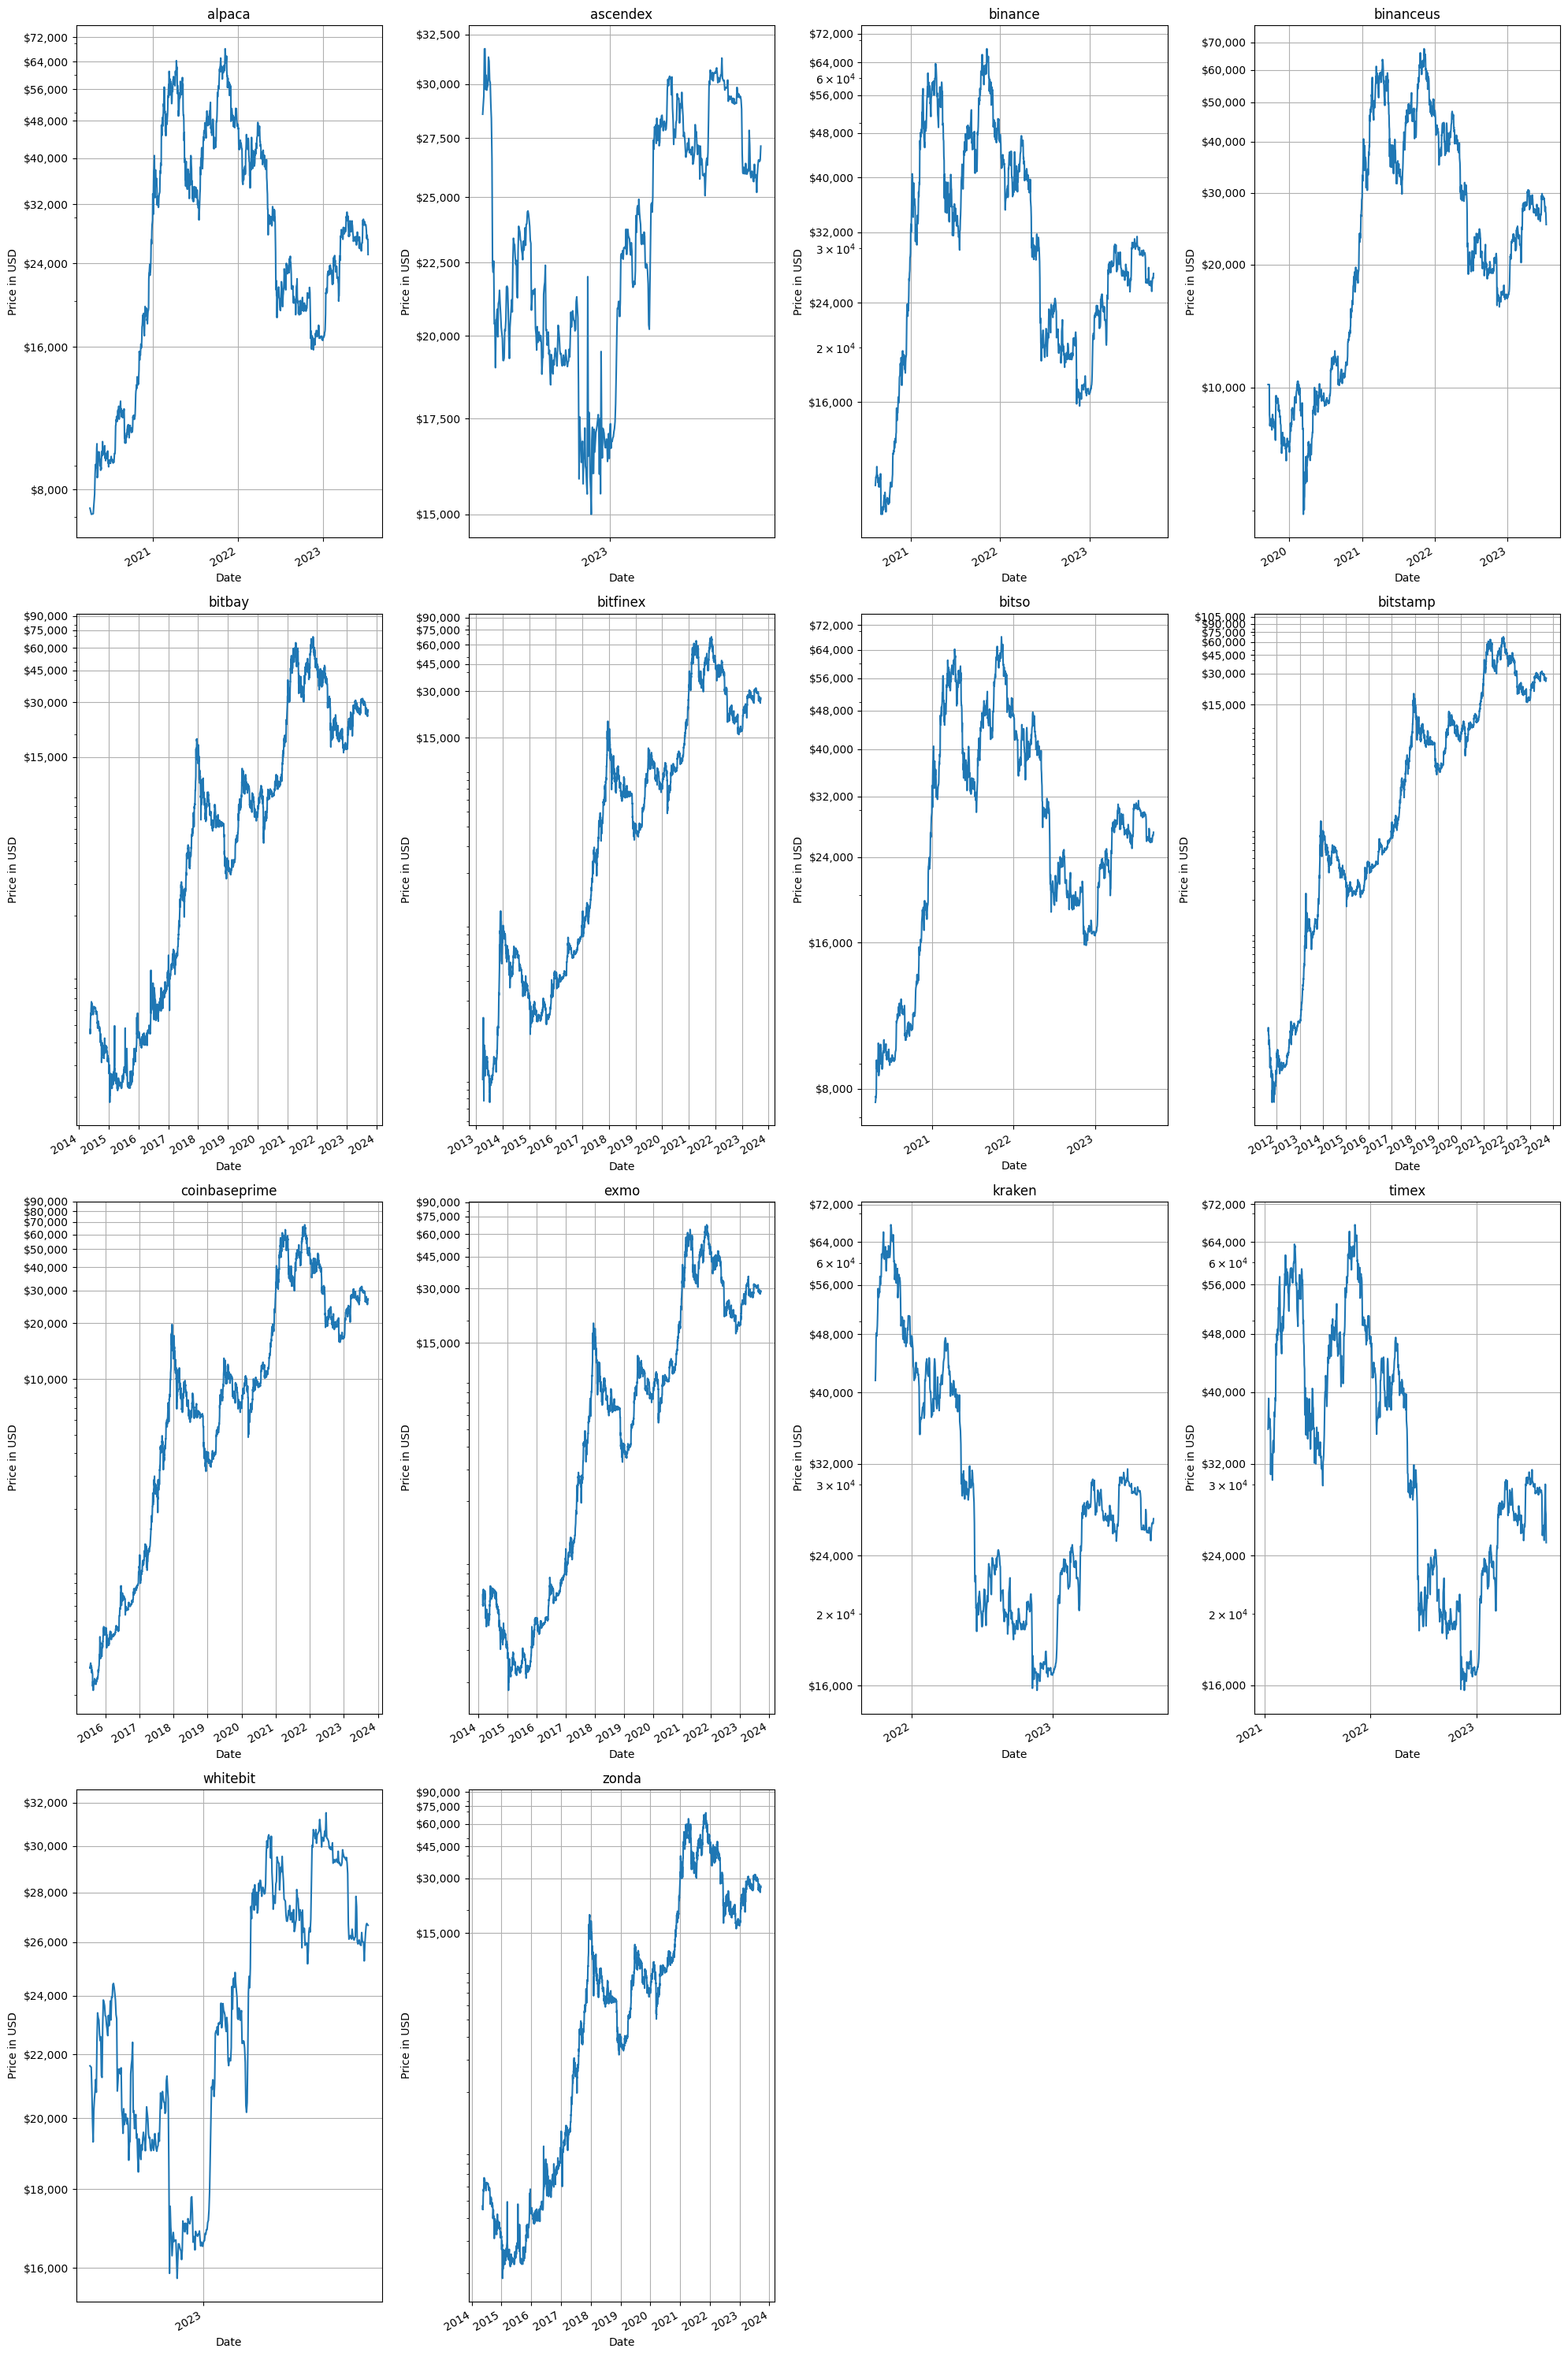

In [393]:
#Create a figure with all the exchanges as subplots, log in y axis and usd in y axis and date in x axis
fig, axs = plt.subplots(4, 4, figsize=(20, 30))
axs = axs.ravel()
for i, (k, v) in enumerate(dict_exchanges.items()):
    v["Close"].plot(ax=axs[i], logy=True, title=k)
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Price in USD")
    axs[i].grid()
    #x axis only showing the year, not the month nor the day, only like 2010, 2011, etc
    axs[i].xaxis.set_major_locator(mdates.YearLocator())

    #y axis in dollars
    axs[i].yaxis.set_major_locator(plt.MaxNLocator(9))
    #set the y axis in dollars
    axs[i].yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

#hide the last plot
axs[14].set_visible(False)
axs[15].set_visible(False)

    
plt.tight_layout()
plt.show()


    

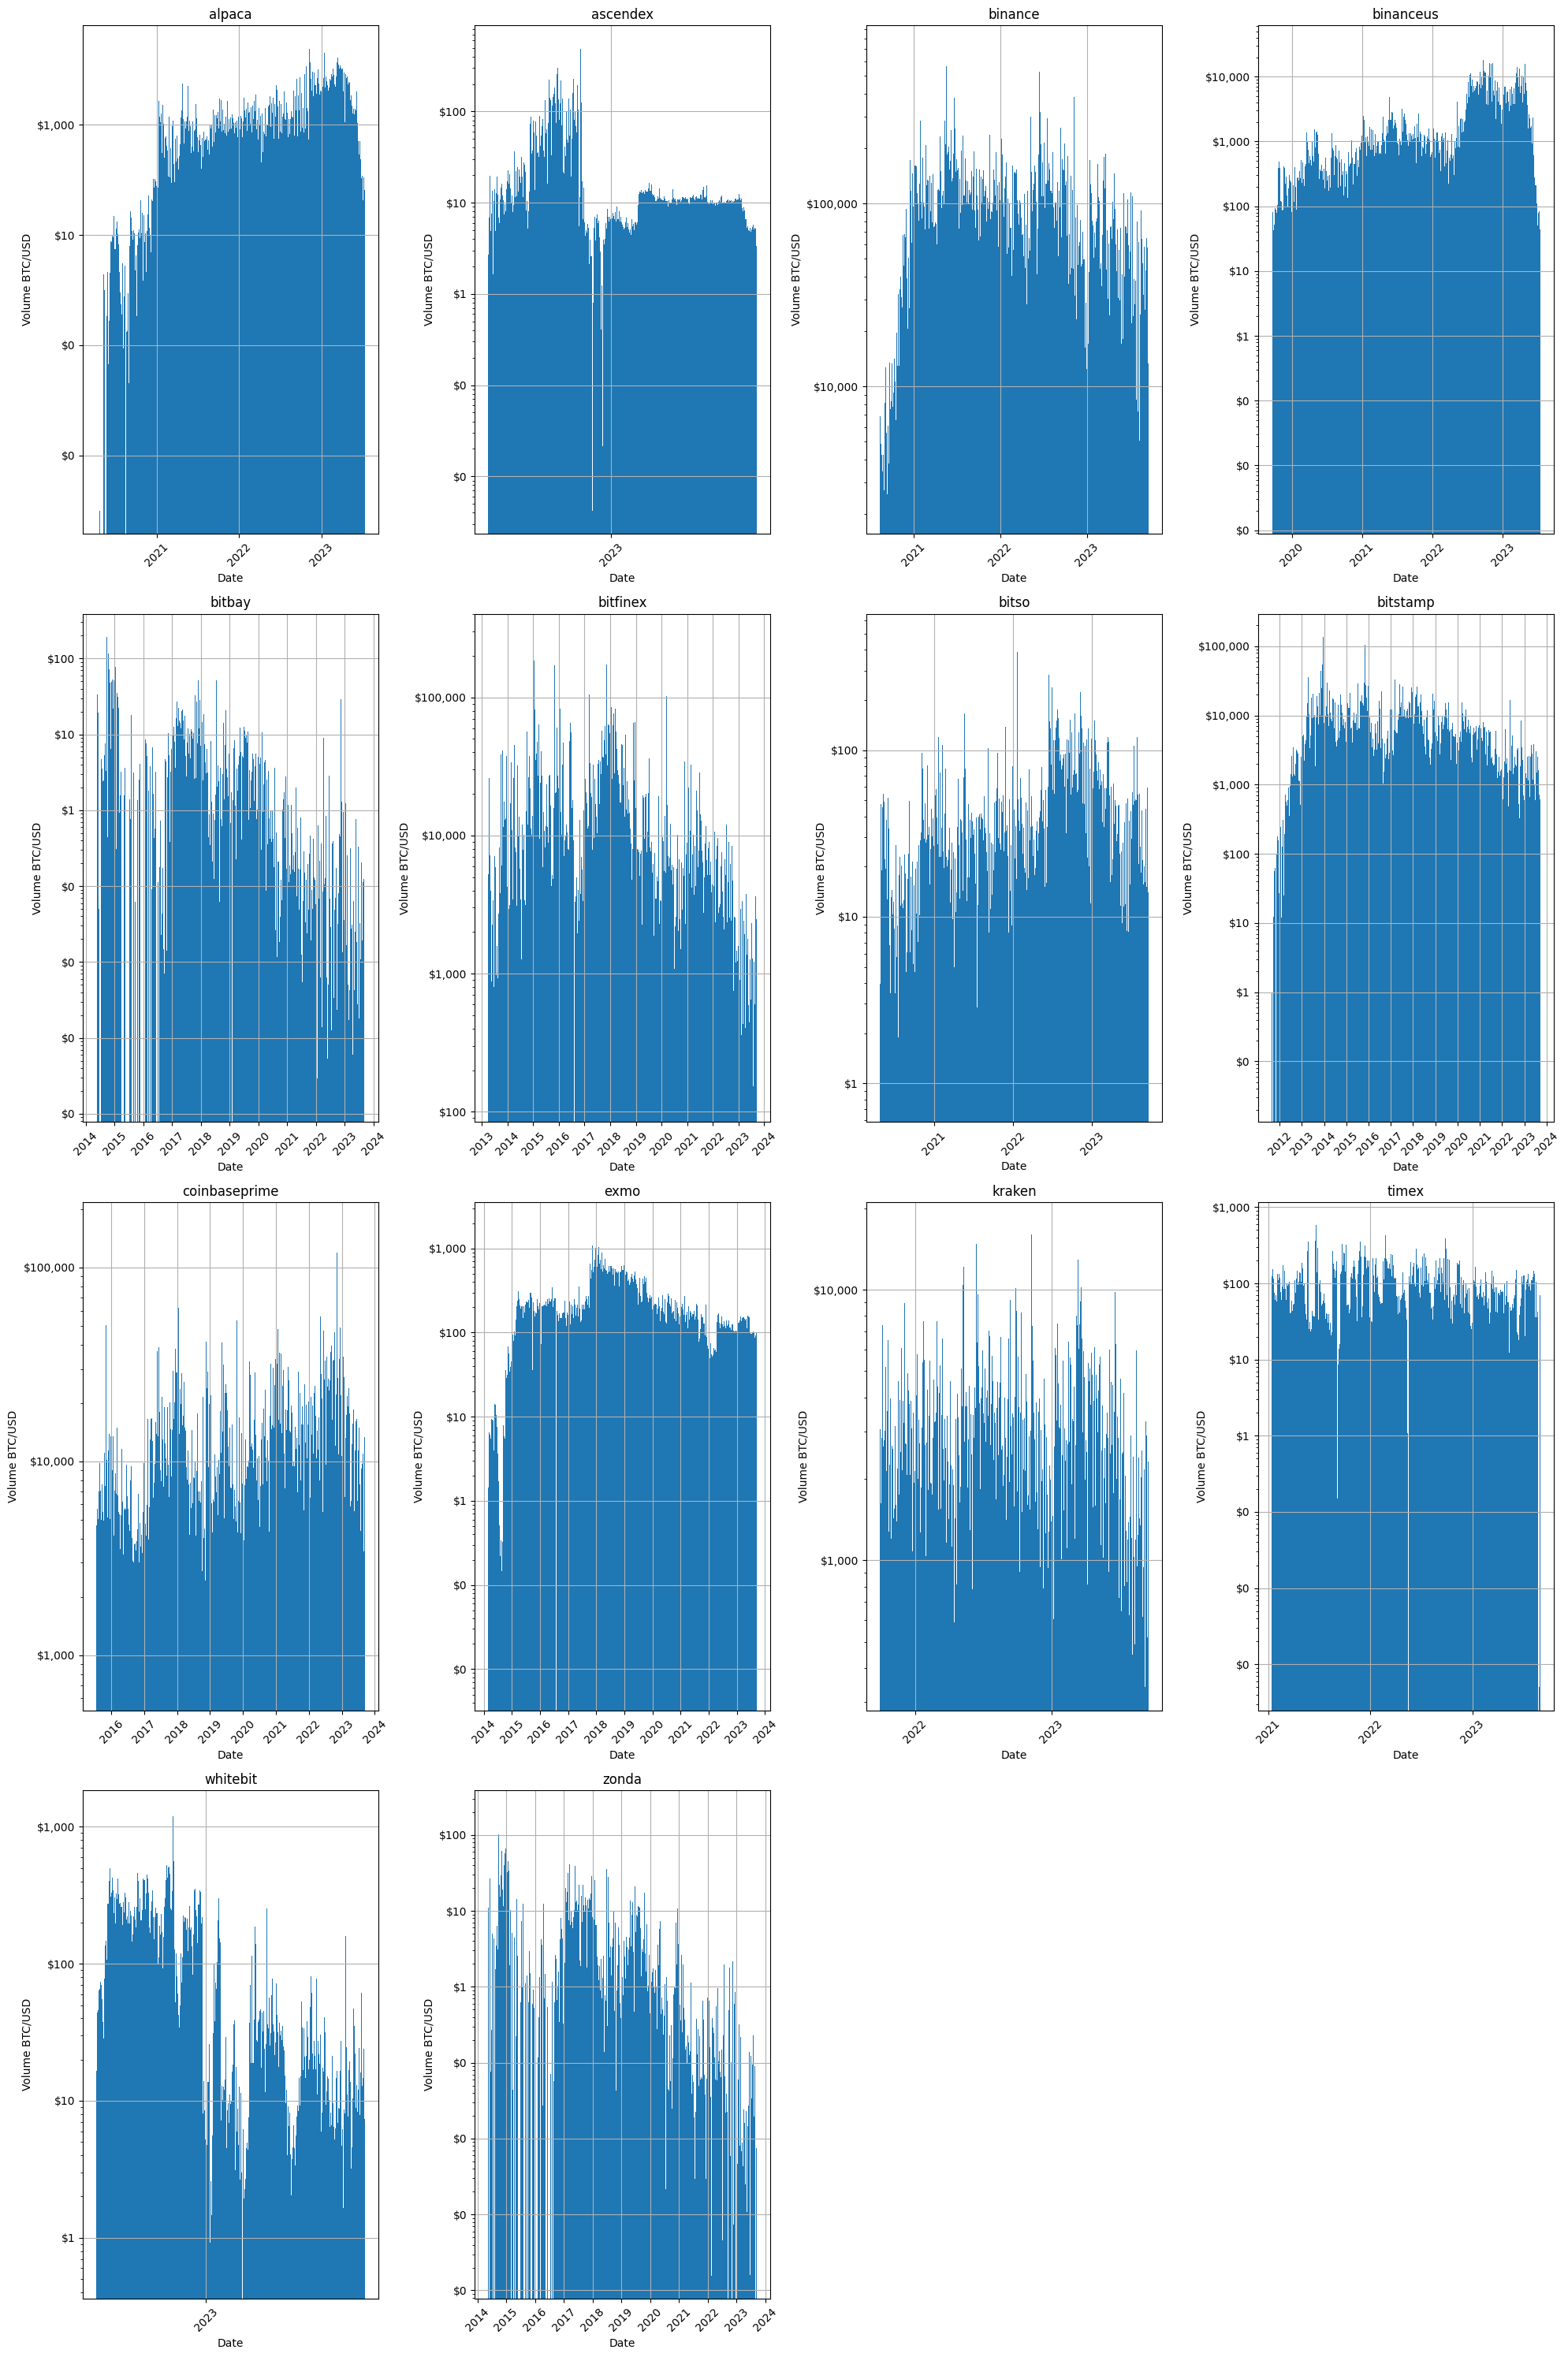

In [413]:

#Create a figure with all the exchanges as subplots, log in y axis and usd in y axis and date in x axis
fig, axs = plt.subplots(4, 4, figsize=(20, 30))
axs = axs.ravel()
for i, (k, v) in enumerate(dict_exchanges.items()):
    #title
    axs[i].set_title(k)
    axs[i].bar(v.index, v["Volume"], alpha=0.3, width=1, label="Volume")
    axs[i].set_ylabel("Volume BTC/USD")
    axs[i].set_yscale("log")
    axs[i].yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
    axs[i].grid(which='major', axis='x', linestyle='-')
    axs[i].grid(which='minor', axis='x', linestyle=':')
    axs[i].grid(which='major', axis='y', linestyle='-')
    axs[i].set_xlabel("Date")
    
    #x axis only showing the year, not the month nor the day, only like 2010, 2011, etc
    axs[i].xaxis.set_major_locator(mdates.YearLocator())
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format to show only years
    #axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    axs[i].tick_params(axis='x', rotation=45)
    #y axis in dollars
    #axs[i].yaxis.set_major_locator(plt.MaxNLocator(5))

#hide the last plot
axs[14].set_visible(False)
axs[15].set_visible(False)

plt.tight_layout()
plt.show()


    

In [343]:
#bitstamp one of the osdest exchanges
start_dt = datetime.strptime('20111001', "%Y%m%d")
since = calendar.timegm(start_dt.utctimetuple())*1000
exchange = ccxt.bitstamp()
ex = "bitstamp"
lista_ohlcv = exchange.fetch_ohlcv(symbol="BTC/USD", timeframe="1d", since=since, limit=3000)
df = pd.DataFrame(lista_ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
df['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df['Time']]
df['Open'] = df['Open'].astype(np.float64)
df['High'] = df['High'].astype(np.float64)
df['Low'] = df['Low'].astype(np.float64)
df['Close'] = df['Close'].astype(np.float64)
df['Volume'] = df['Volume'].astype(np.float64)
df.set_index('Time', inplace=True)
print(f"{ex} : {len(df)}, {df.index[0]}, {df.index[-1]}")


mercado : 1000, 2017-03-23 21:00:00, 2019-12-17 21:00:00


# Create a Price and volume history for bitcoin since 2011

In [395]:
# open mtgox csv file /home/moises/Data_BTC_thesis/df_price_btc_usd_mtgox_buy_just_with_fees_weighted.csv"
df = pd.read_csv("/home/moises/Data_BTC_thesis/df_price_btc_usd_mtgox_buy_just_with_fees_weighted.csv", index_col=0)
df.index = pd.to_datetime(df.index)
#rename the column to Close and Volume
df.rename(columns={"Price BTC/USD": "Close", "DTVL_BTC_USD": "Volume"}, inplace=True)
df

,Close,Volume
Date,,
2011-04-01,0.778881,2.163200e+03
2011-04-02,0.788313,1.777404e+03
2011-04-03,0.781816,2.601870e+03
2011-04-04,0.706373,1.712995e+04
2011-04-05,0.673288,6.522408e+03
...,...,...
2013-11-24,801.807304,2.543418e+07
2013-11-25,813.695019,2.620452e+07
2013-11-26,896.969109,3.502124e+07


<AxesSubplot:xlabel='Date'>

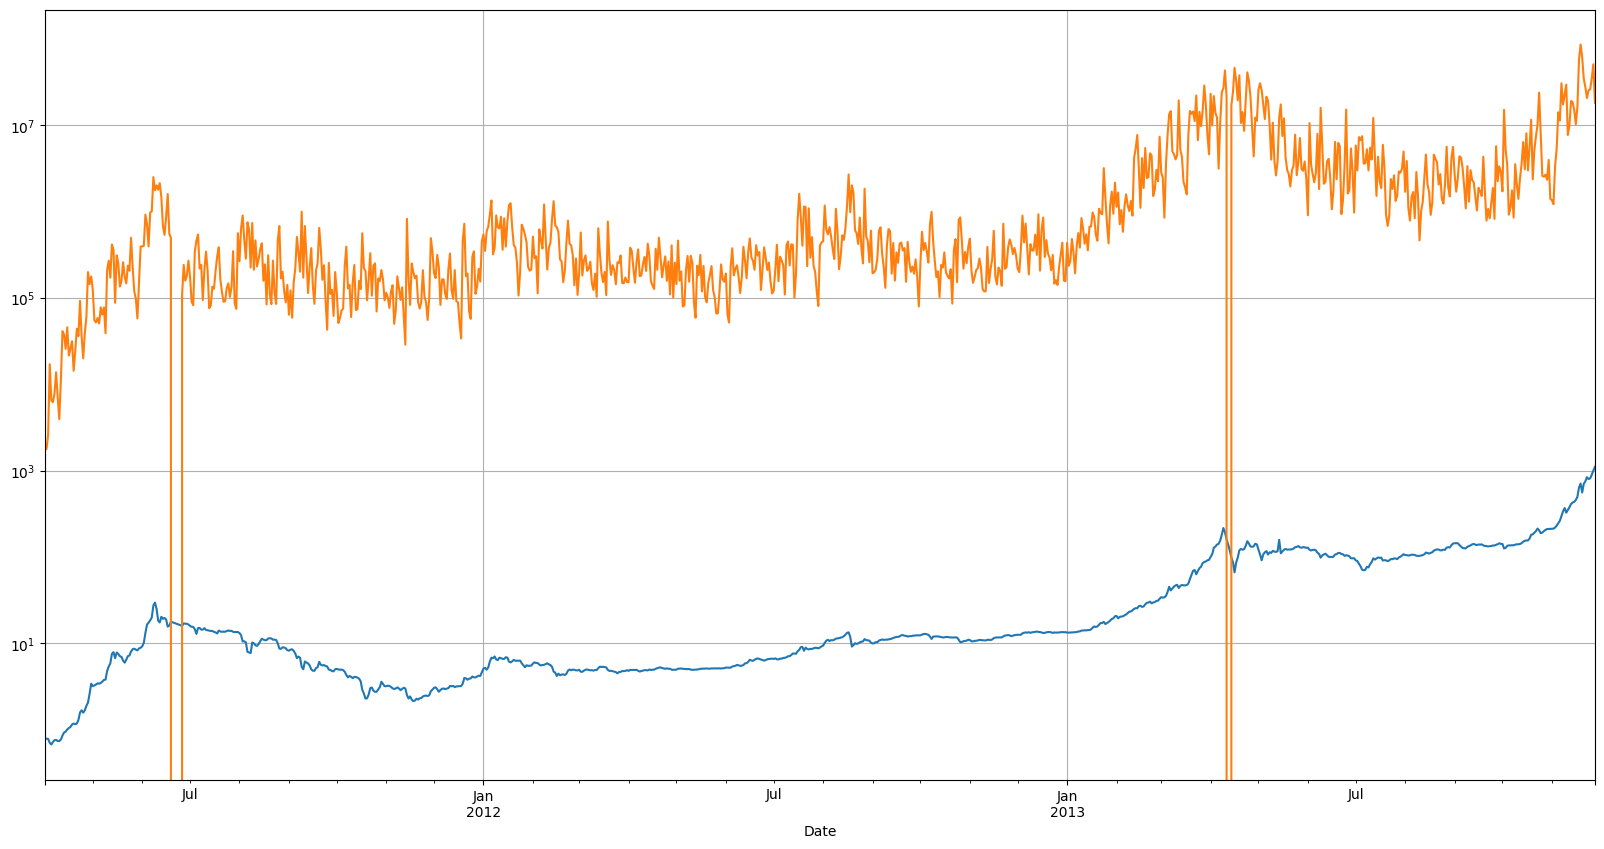

In [400]:
# inset the median value of one value after and one before of the price in the missing values
df["Close"].interpolate(method="linear", inplace=True)
df["Volume"].interpolate(method="linear", inplace=True)
df["Close"].plot(figsize=(20,10), grid=True, logy=True)
#plot the volume
df["Volume"].plot(figsize=(20,10), grid=True, logy=True)

In [401]:
dict_exchanges_with_mtgox = dict_exchanges.copy()
dict_exchanges_with_mtgox["mtgox"] = df

In [397]:
v["Volume"]

Time
2014-05-15 21:00:00    24.468436
2014-05-16 21:00:00     0.152970
2014-05-18 21:00:00    45.048499
2014-05-19 21:00:00    33.560412
2014-05-20 21:00:00    11.044952
                         ...    
2023-09-13 21:00:00     0.045263
2023-09-14 21:00:00     0.153199
2023-09-15 21:00:00     0.857940
2023-09-16 21:00:00     0.680256
2023-09-17 21:00:00     0.324936
Name: Volume, Length: 3080, dtype: float64

In [402]:
#Function that creates my data frame with the price of BTC agregated by volume

price_BTC_agreate = pd.DataFrame()
volume_BTC_agreate  = pd.DataFrame()
for i, (k, v) in enumerate(dict_exchanges_with_mtgox.items()):
    #convert the index to just date
    #v.index = v.index.date
    #Create a data frame with a single column of the close values of each exchange wheited by the volume
    df_price_times_volume = pd.DataFrame(v["Close"]*v["Volume"], columns=[k])
    #inset the column in the price_BTC_agreate data frame using the index as reference
    price_BTC_agreate = price_BTC_agreate.join(df_price_times_volume, how="outer")

    
    #Create a data frame with a single column of the volume values of each exchange
    df_volume = pd.DataFrame(v["Volume"])
    volume_BTC_agreate.rename(columns={"Volume": k}, inplace=True)
    #inset the column in the volume_BTC_agreate data frame using the index as reference
    volume_BTC_agreate = volume_BTC_agreate.join(df_volume, how="outer")


price_BTC_agreate["sum"] = price_BTC_agreate.sum(axis=1)
volume_BTC_agreate["sum"] = volume_BTC_agreate.sum(axis=1)

df_price_btc_agregate = pd.DataFrame()
df_price_btc_agregate["Close"] = price_BTC_agreate["sum"]/volume_BTC_agreate["sum"]
#index to datetime
#price_BTC_agreate.index = pd.to_datetime(price_BTC_agreate.index)
#price_BTC_agreate.plot(figsize=(20,10), grid=True, logy=True)


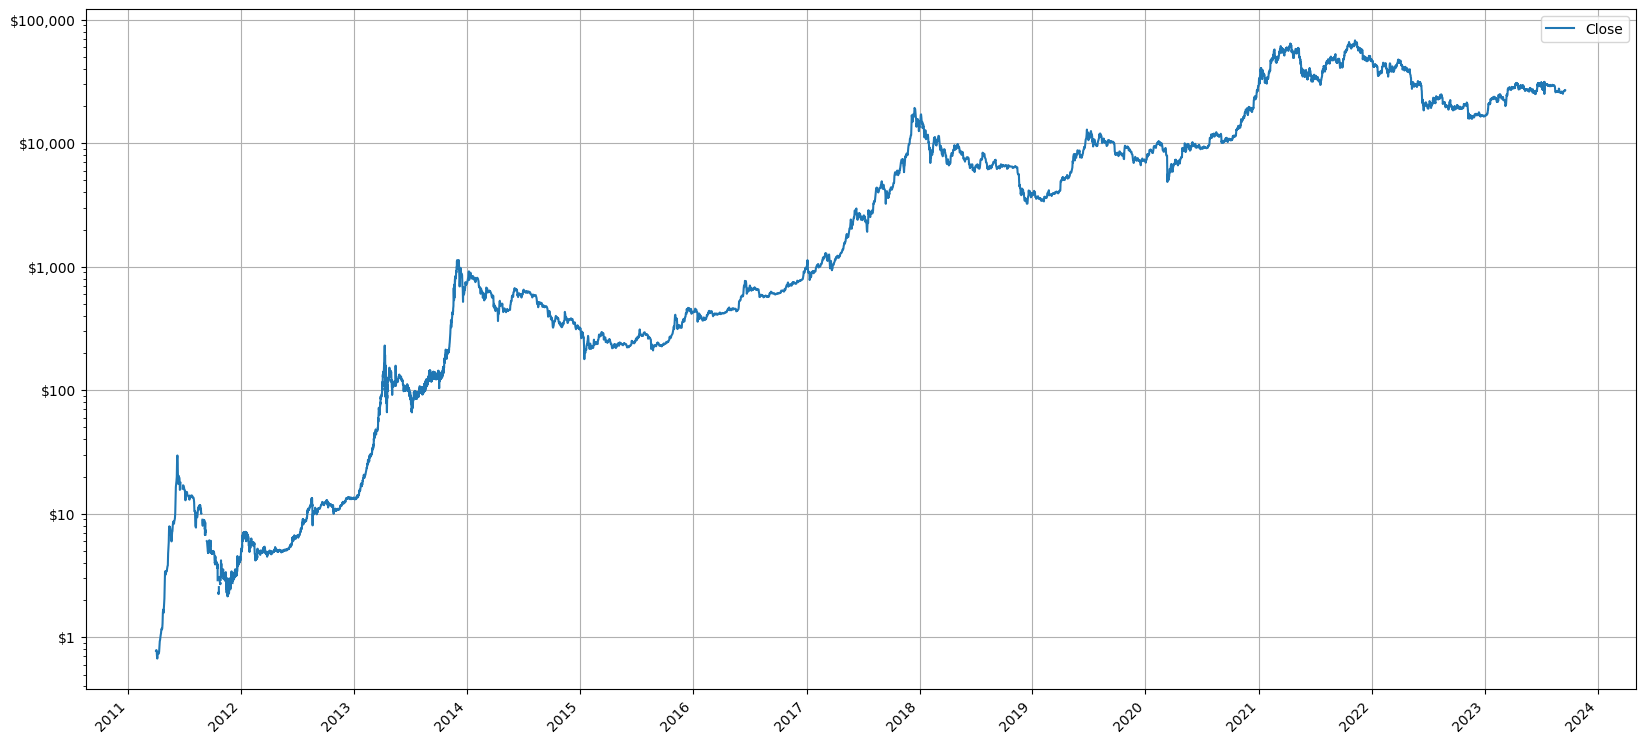

In [403]:
df_price_btc_agregate.plot(figsize=(20,10), grid=True, logy=True)
# y axis in dollars
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
#x axis only showing the year, not the month nor the day, only like 2010, 2011, etc
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format to show only years
ax.tick_params(axis='x', rotation=45)
plt.show()

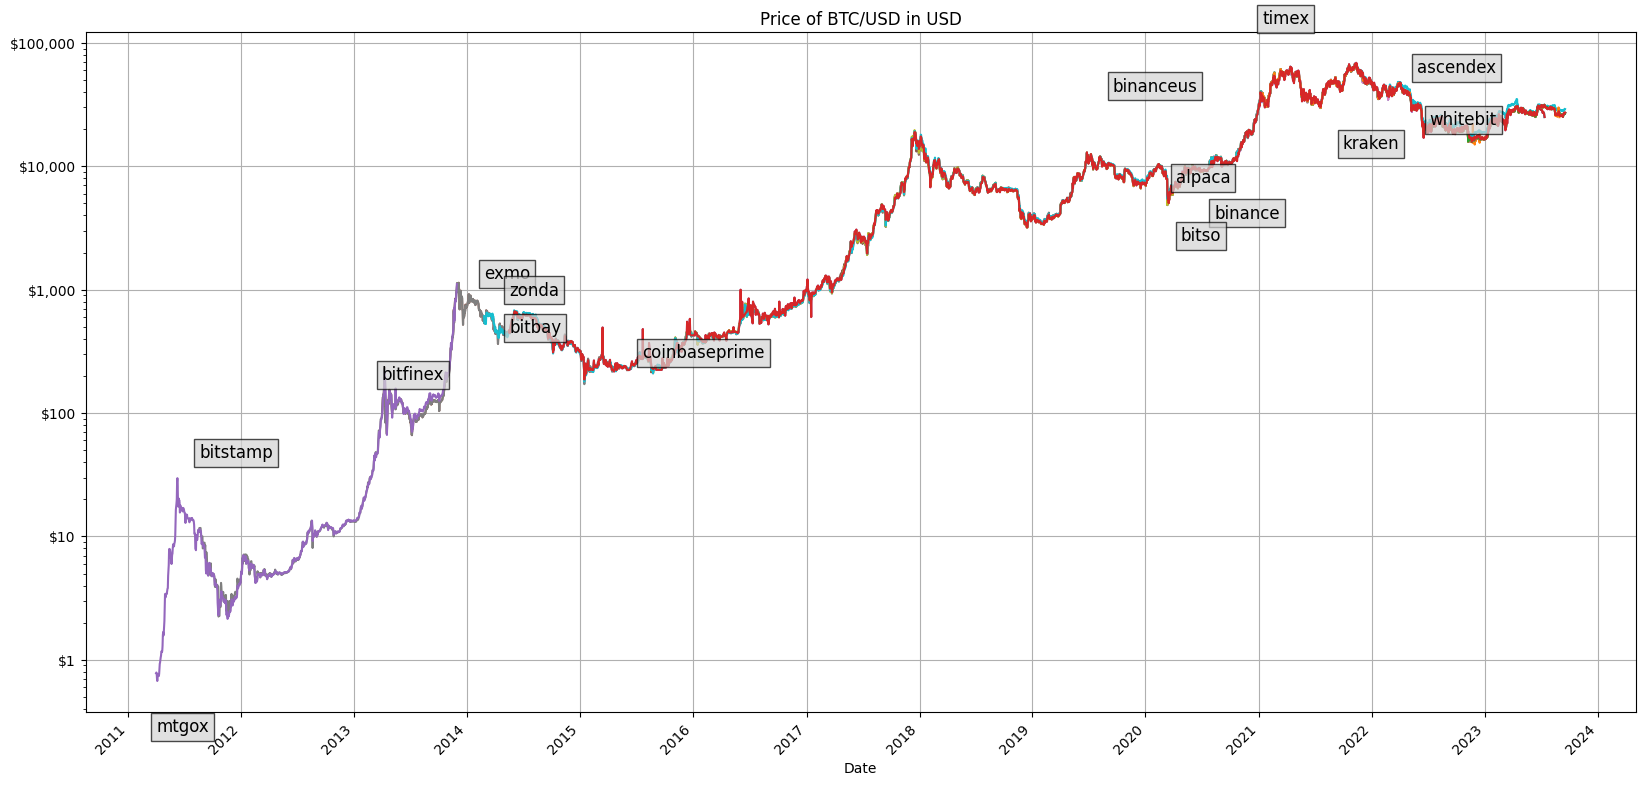

In [412]:
#iterate through the dictionary and plot the price of each exchange in the same plot
for i,(k, v) in enumerate(dict_exchanges_with_mtgox.items()):
    v["Close"].plot(figsize=(20,10), grid=True, logy=True, label=k)
    # y axis in dollars
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))
    #x axis only showing the year, not the month nor the day, only like 2010, 2011, etc
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format to show only years
    ax.tick_params(axis='x', rotation=45)
    #plt.legend(loc="upper left")
    #insert the name of the exchange in the plot where its first data is available
    bbox_props = dict(boxstyle="square,pad=0.3", facecolor="lightgray", alpha=0.7)

    #title
    plt.title("Price of BTC/USD in USD")
    
    m =(i%4 +1) if i%2 != 0 else 1/(i%4 +1)
    plt.text(v.index[0], v["Close"][0]*m, k, fontsize=12, bbox=bbox_props)

plt.show()

In [267]:
# sum rows

price_BTC_agreate

,binance,binanceus,binanceusdm,bitbay,bitfinex,bitmex,bitso,bitstamp,currencycom,gate,...,gemini,kraken,lbank,lbank2,probit,timex,tokocrypto,zonda,mtgox,sum
2011-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1684.874613,1.684875e+03
2011-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1401.150670,1.401151e+03
2011-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2034.182686,2.034183e+03
2011-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12100.126963,1.210013e+04
2011-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4391.456035,4.391456e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-13,1.016700e+09,NaN,1.009158e+10,1220.947223,6.796787e+07,195065.50500,1.560994e+06,5.536671e+07,57536195.4,2.266083e+08,...,1.098305e+07,6.864464e+07,1.725394e+08,1.725394e+08,1.822281e+07,NaN,1.016700e+09,1220.947223,NaN,1.320376e+10
2023-09-14,6.976460e+08,NaN,6.691830e+09,4090.412499,2.400905e+07,215316.01000,9.786381e+05,3.695204e+07,55435025.2,1.593945e+08,...,1.103126e+07,7.289035e+07,1.602206e+08,1.602206e+08,2.085335e+07,NaN,6.976460e+08,4090.412499,NaN,8.948726e+09
2023-09-15,3.707978e+08,NaN,3.729374e+09,22805.811832,8.095179e+06,165414.24480,1.179845e+06,1.620071e+07,52515446.4,9.061766e+07,...,2.573484e+06,1.379018e+07,1.518290e+08,1.518290e+08,1.996151e+07,NaN,3.707978e+08,22805.811832,NaN,5.070390e+09
2023-09-16,2.877961e+08,NaN,2.403156e+09,18388.196399,4.730353e+06,48837.05755,4.032869e+05,9.990463e+06,48625848.5,4.815161e+07,...,NaN,7.748405e+06,1.231678e+08,1.231678e+08,9.177452e+06,NaN,2.888201e+08,18388.196399,NaN,3.403173e+09


In [338]:
import requests

url = "https://api.bitpreco.com/all-brl/ticker"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)


{"success":true,"ABFY-BRL":{"market":"ABFY-BRL","last":0.1293,"high":0.1293,"low":0.113,"vol":9546.0305865,"avg":0.117636,"var":12.43,"buy":0.1142,"sell":0.129,"timestamp":"2023-09-18 09:55:30"},"ADA-BRL":{"market":"ADA-BRL","last":1.2489,"high":1.2514,"low":1.199,"vol":14745.25659787,"avg":1.236737,"var":2.08,"buy":1.2393,"sell":1.2451,"timestamp":"2023-09-18 10:11:19"},"ATLAS-BRL":{"market":"ATLAS-BRL","last":0.007,"high":0.007471,"low":0.007,"vol":19006.08976099,"avg":0.007297,"var":-6.3,"buy":0.006735,"sell":0.006966,"timestamp":"2023-09-18 03:14:51"},"AXS-BRL":{"market":"AXS-BRL","last":22.6674,"high":22.6674,"low":22.3455,"vol":5.35556662,"avg":22.598895,"var":1.41,"buy":22.6674,"sell":22.6674,"timestamp":"2023-09-18 09:36:48"},"BNB-BRL":{"market":"BNB-BRL","last":1068.999961,"high":1068.999961,"low":1051,"vol":1.24847202,"avg":1059.455612,"var":1.71,"buy":1071,"sell":1081,"timestamp":"2023-09-18 09:33:17"},"BTC-BRL":{"market":"BTC-BRL","last":133626.000024,"high":133998,"low":12